In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [316]:
#Read in the csv file and convert to a Pandas dataframe
filename = r"C:\Users\mmm19\Desktop\Bootcamp\data\final_data.csv"
df = pd.read_csv(filename)

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [32]:
dtale.show(df)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [3]:
df["name"].value_counts()

Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: name, Length: 10584, dtype: int64

In [317]:
df["winger"].unique()

array([0, 1], dtype=int64)

In [318]:
df.drop(columns=["name", "player", "position_encoded", "winger"], inplace=True)

In [6]:
df.head()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
2,Manchester United,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000
4,Manchester United,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000


In [40]:
df1.shape

(10667, 22)

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [58]:
# Licensed in kaggle

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# in 2 season 2021-2022 and 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [59]:
# Consistent

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# the data is relevant

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [41]:
df.duplicated().sum()

0

In [66]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [42]:
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [43]:
# check columns types
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [44]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

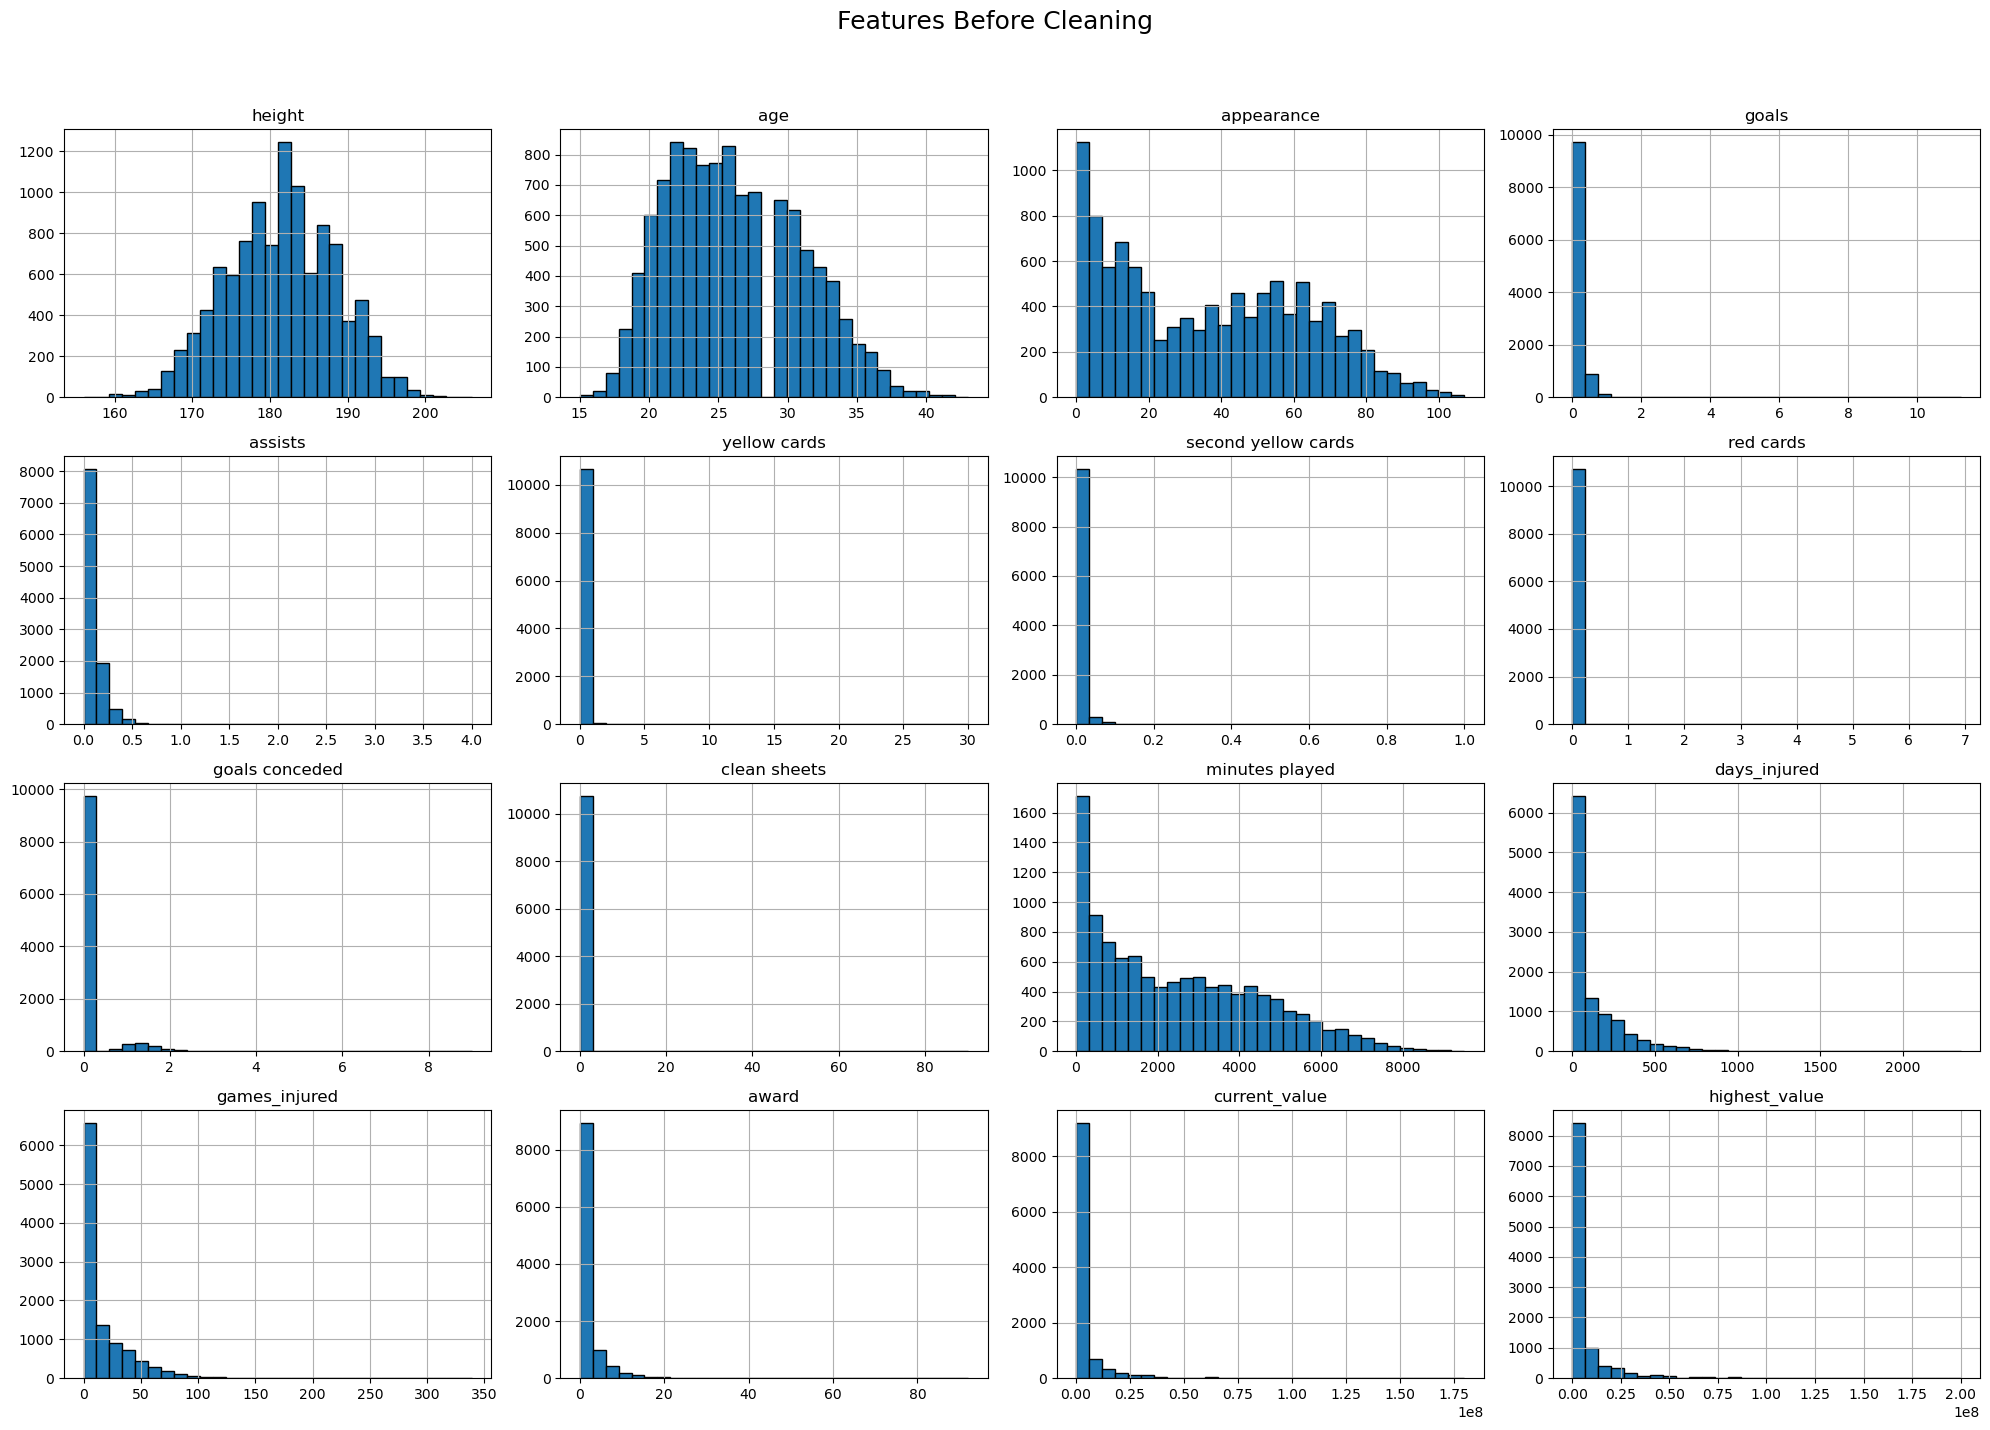

In [319]:
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Features Before Cleaning", fontsize=18)  # Add title with fontsize
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

In [392]:
df = df[df["goals"] <=0.5]

(array([3616.,  806.,  519.,  309.,  264.,  214.,  189.,  135.,  106.,
          68.]),
 array([0.        , 0.0498155 , 0.099631  , 0.14944649, 0.19926199,
        0.24907749, 0.29889299, 0.34870849, 0.39852399, 0.44833948,
        0.49815498]),
 <BarContainer object of 10 artists>)

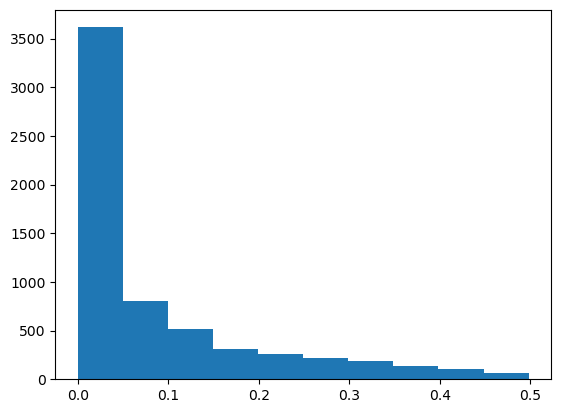

In [393]:
plt.hist(df["goals"])

In [322]:
df = df[df["assists"] <= 0.30]

(array([4944., 1012.,  896.,  803.,  720.,  525.,  428.,  320.,  262.,
         161.]),
 array([0.        , 0.02998751, 0.05997501, 0.08996252, 0.11995002,
        0.14993753, 0.17992503, 0.20991254, 0.23990004, 0.26988755,
        0.29987505]),
 <BarContainer object of 10 artists>)

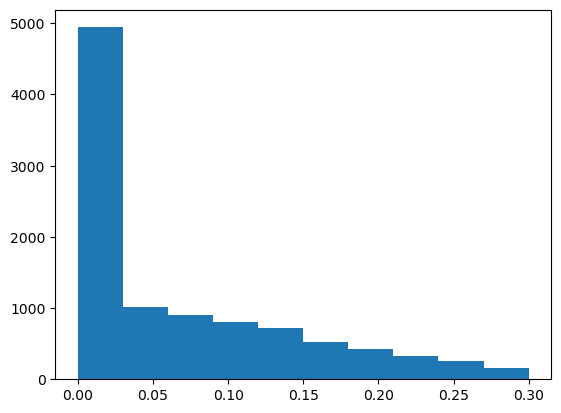

In [323]:
plt.hist(df["assists"])

In [324]:
df = df[df["yellow cards"] <= 0.6]

(array([2617., 1473., 1776., 1504., 1033.,  689.,  366.,  194.,  100.,
          70.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ]),
 <BarContainer object of 10 artists>)

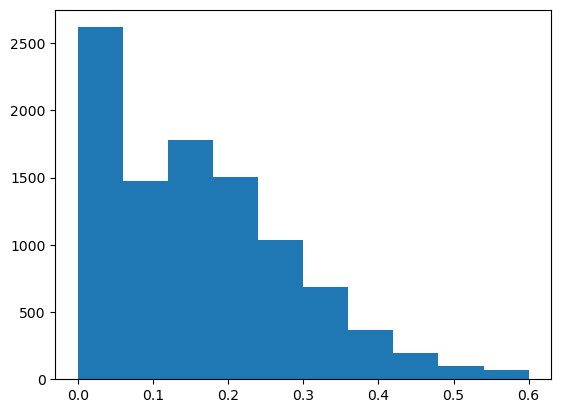

In [325]:
plt.hist(df["yellow cards"])

In [326]:
df= df[df["second yellow cards"] <= 0.1]

(array([8724.,  347.,  292.,  158.,   85.,   54.,   35.,   29.,   23.,
          16.]),
 array([0.        , 0.00995575, 0.0199115 , 0.02986726, 0.03982301,
        0.04977876, 0.05973451, 0.06969027, 0.07964602, 0.08960177,
        0.09955752]),
 <BarContainer object of 10 artists>)

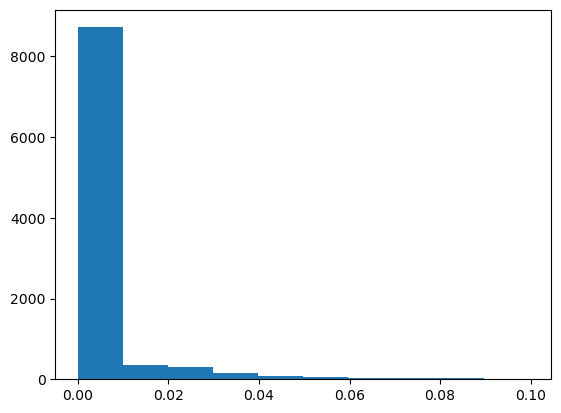

In [327]:
plt.hist(df["second yellow cards"])

In [328]:
df = df[df["red cards"] <= 0.1]

(array([8494.,  368.,  338.,  187.,  119.,   73.,   42.,   36.,   28.,
          10.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <BarContainer object of 10 artists>)

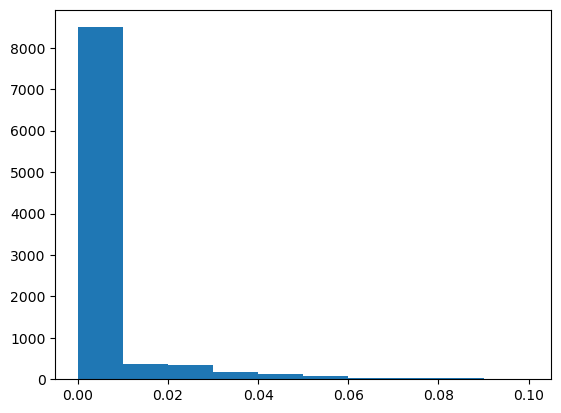

In [329]:
plt.hist(df["red cards"])

In [330]:
df = df[df["goals conceded"] <= 2]

(array([8.693e+03, 2.000e+00, 1.900e+01, 4.400e+01, 1.170e+02, 1.950e+02,
        2.040e+02, 1.680e+02, 9.800e+01, 7.500e+01]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

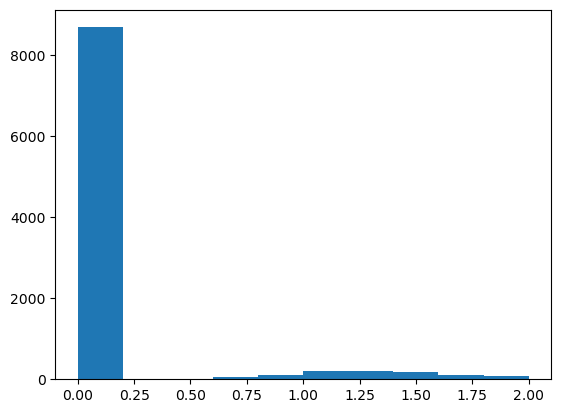

In [331]:
plt.hist(df["goals conceded"])

In [332]:
df = df[df["clean sheets"] < 0.5]

(array([8711.,   12.,   53.,   85.,  119.,  170.,  134.,   95.,   82.,
          45.]),
 array([0.        , 0.04945055, 0.0989011 , 0.14835165, 0.1978022 ,
        0.24725275, 0.2967033 , 0.34615385, 0.3956044 , 0.44505495,
        0.4945055 ]),
 <BarContainer object of 10 artists>)

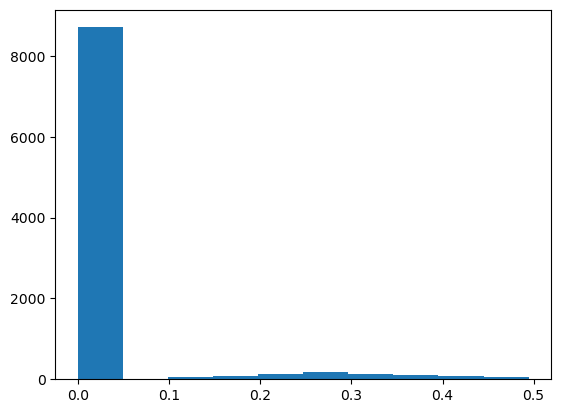

In [333]:
plt.hist(df["clean sheets"])

In [334]:
df = df[df["minutes played"] <= 6000]

(array([1849., 1151., 1036.,  801.,  863.,  792.,  756.,  696.,  545.,
         418.]),
 array([   0.,  600., 1200., 1800., 2400., 3000., 3600., 4200., 4800.,
        5400., 6000.]),
 <BarContainer object of 10 artists>)

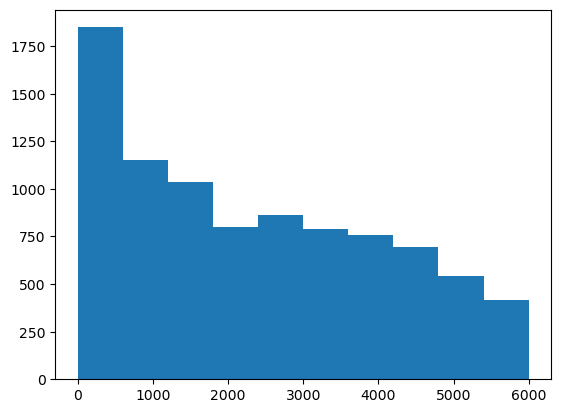

In [335]:
plt.hist(df["minutes played"])

In [353]:
df = df[df["days_injured"] <= 400]

(array([4125.,  610.,  414.,  307.,  245.,  198.,  206.,  141.,  109.,
          85.]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.]),
 <BarContainer object of 10 artists>)

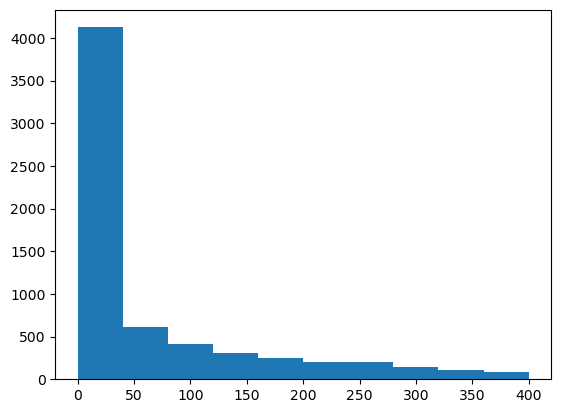

In [354]:
plt.hist(df["days_injured"])

In [356]:
df = df[df["games_injured"] <= 50]

(array([4018.,  625.,  447.,  339.,  256.,  191.,  161.,  138.,  119.,
          82.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

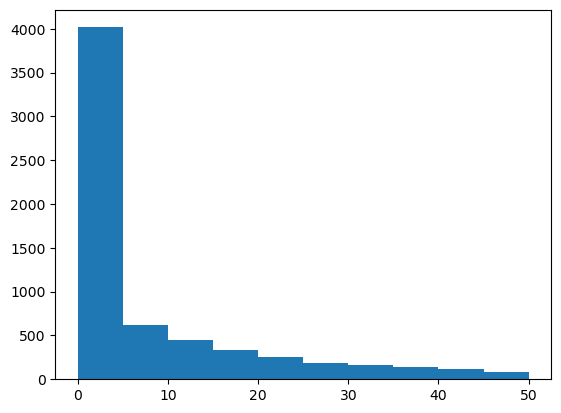

In [357]:
plt.hist(df["games_injured"])

In [342]:
df = df[df["award"] <= 6]

(array([4012., 1836.,    0.,  972.,    0.,  566.,  349.,    0.,  235.,
         167.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

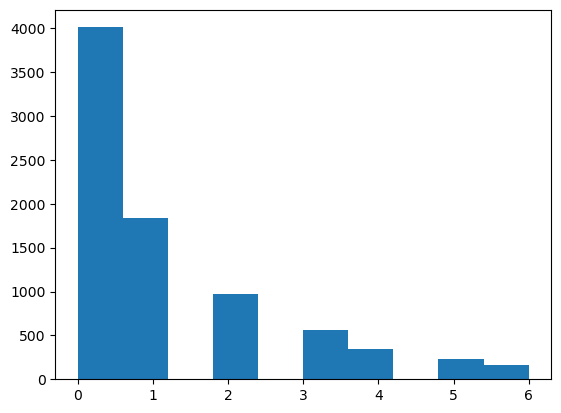

In [343]:
plt.hist(df["award"])

In [344]:
df = df[df["current_value"] <= 5500000]

(array([3577., 1527.,  597.,  449.,  285.,  289.,  146.,  175.,   59.,
         180.]),
 array([      0.,  550000., 1100000., 1650000., 2200000., 2750000.,
        3300000., 3850000., 4400000., 4950000., 5500000.]),
 <BarContainer object of 10 artists>)

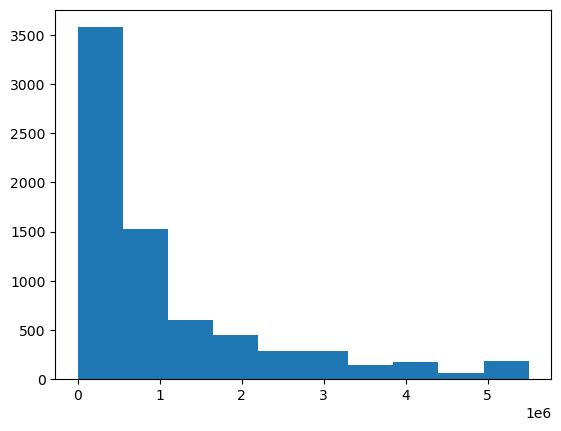

In [345]:
plt.hist(df["current_value"])

In [346]:
df = df[df["highest_value"] <= 5500000]

(array([2669., 1492.,  626.,  469.,  319.,  330.,  179.,  223.,   85.,
         287.]),
 array([      0.,  550000., 1100000., 1650000., 2200000., 2750000.,
        3300000., 3850000., 4400000., 4950000., 5500000.]),
 <BarContainer object of 10 artists>)

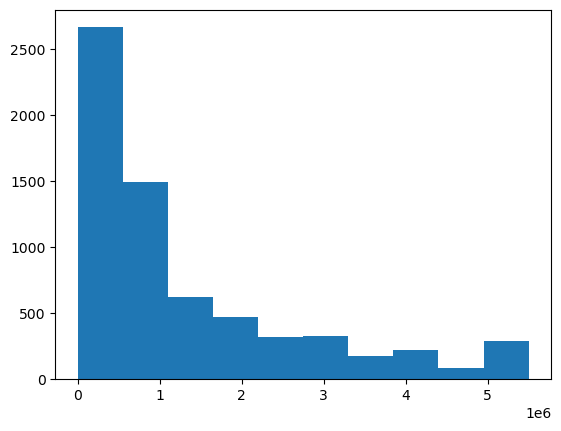

In [347]:
plt.hist(df["highest_value"])

In [348]:
df.shape

(6679, 18)

In [349]:
df.head()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000
20,Manchester United,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.000000,0.000000,2788,0,0,1,800000,800000
21,Manchester United,midfield-CentralMidfield,175.0,18.0,51,0.153759,0.102506,0.000000,0.0,0.0,0.000000,0.000000,3512,0,0,1,800000,800000
55,Leicester City,Goalkeeper,191.0,25.0,65,0.000000,0.000000,0.015340,0.0,0.0,1.257883,0.291461,5867,0,0,0,2000000,2000000
56,Leicester City,Goalkeeper,189.0,33.0,31,0.000000,0.000000,0.064516,0.0,0.0,1.483871,0.161290,2790,89,14,0,600000,3500000


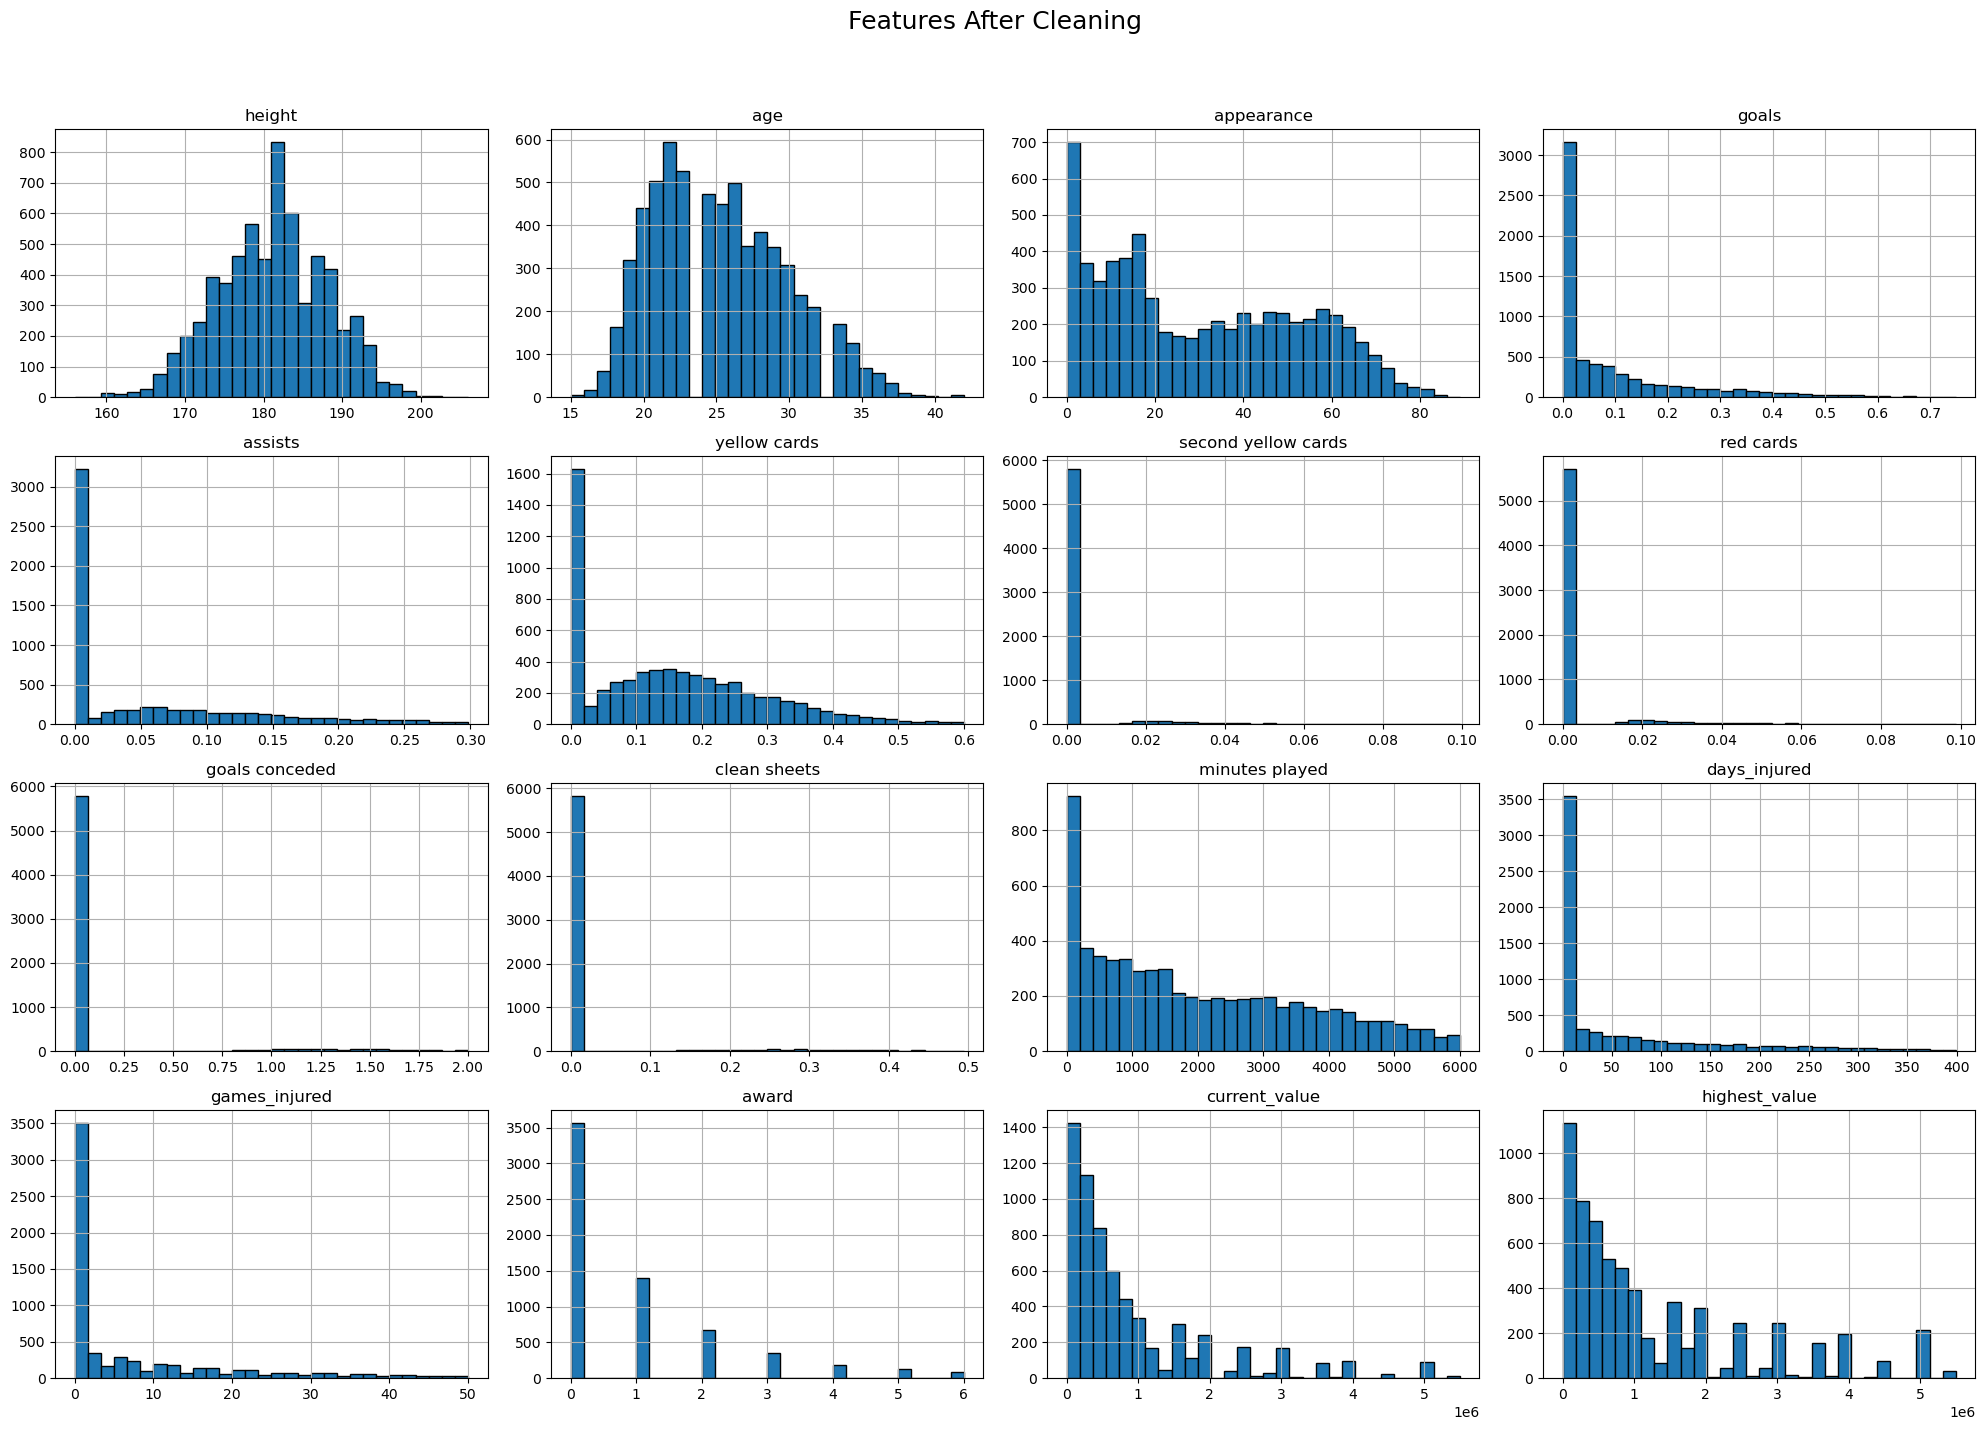

In [358]:
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Features After Cleaning", fontsize=18)  # Add title with fontsize
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

# position distribution
the distribution of the positions in the data set are near to equal portions.

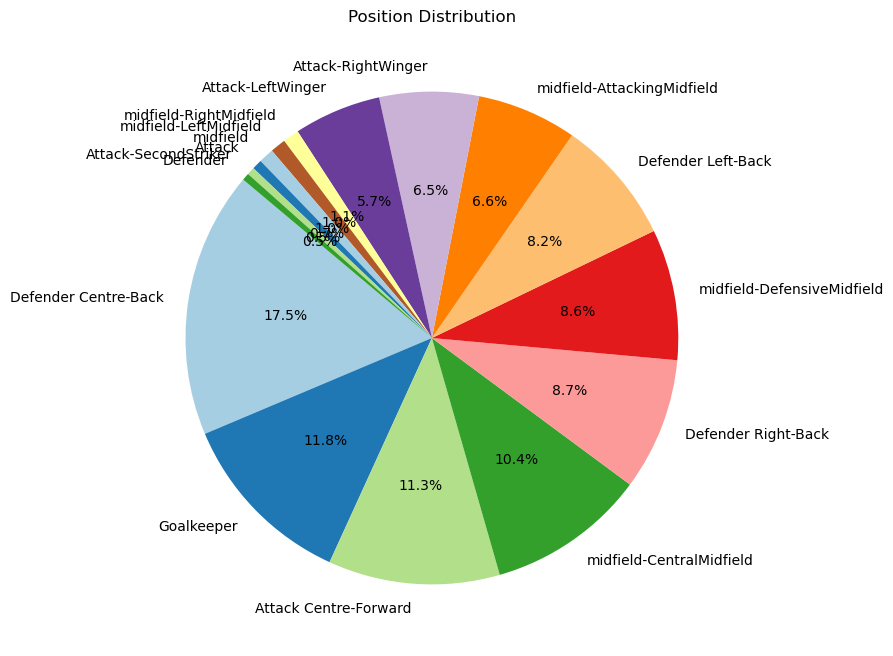

In [295]:
position_counts = df['position'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Adding title
plt.title('Position Distribution')

plt.show()

# players age distribution
from the graph below we notice that the player ages close to be nomally distributed

(array([  83.,  933., 1666.,  959., 1297.,  985.,  427.,  270.,   51.,
           9.]),
 array([15. , 17.7, 20.4, 23.1, 25.8, 28.5, 31.2, 33.9, 36.6, 39.3, 42. ]),
 <BarContainer object of 10 artists>)

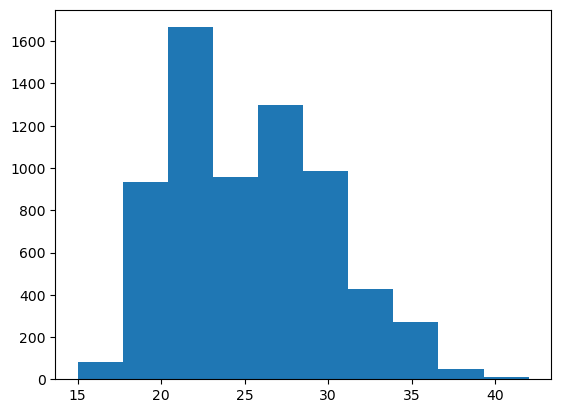

In [296]:
plt.hist(df["age"])

# correlations
we notice that the most impactful to the current value is the "highest value" column

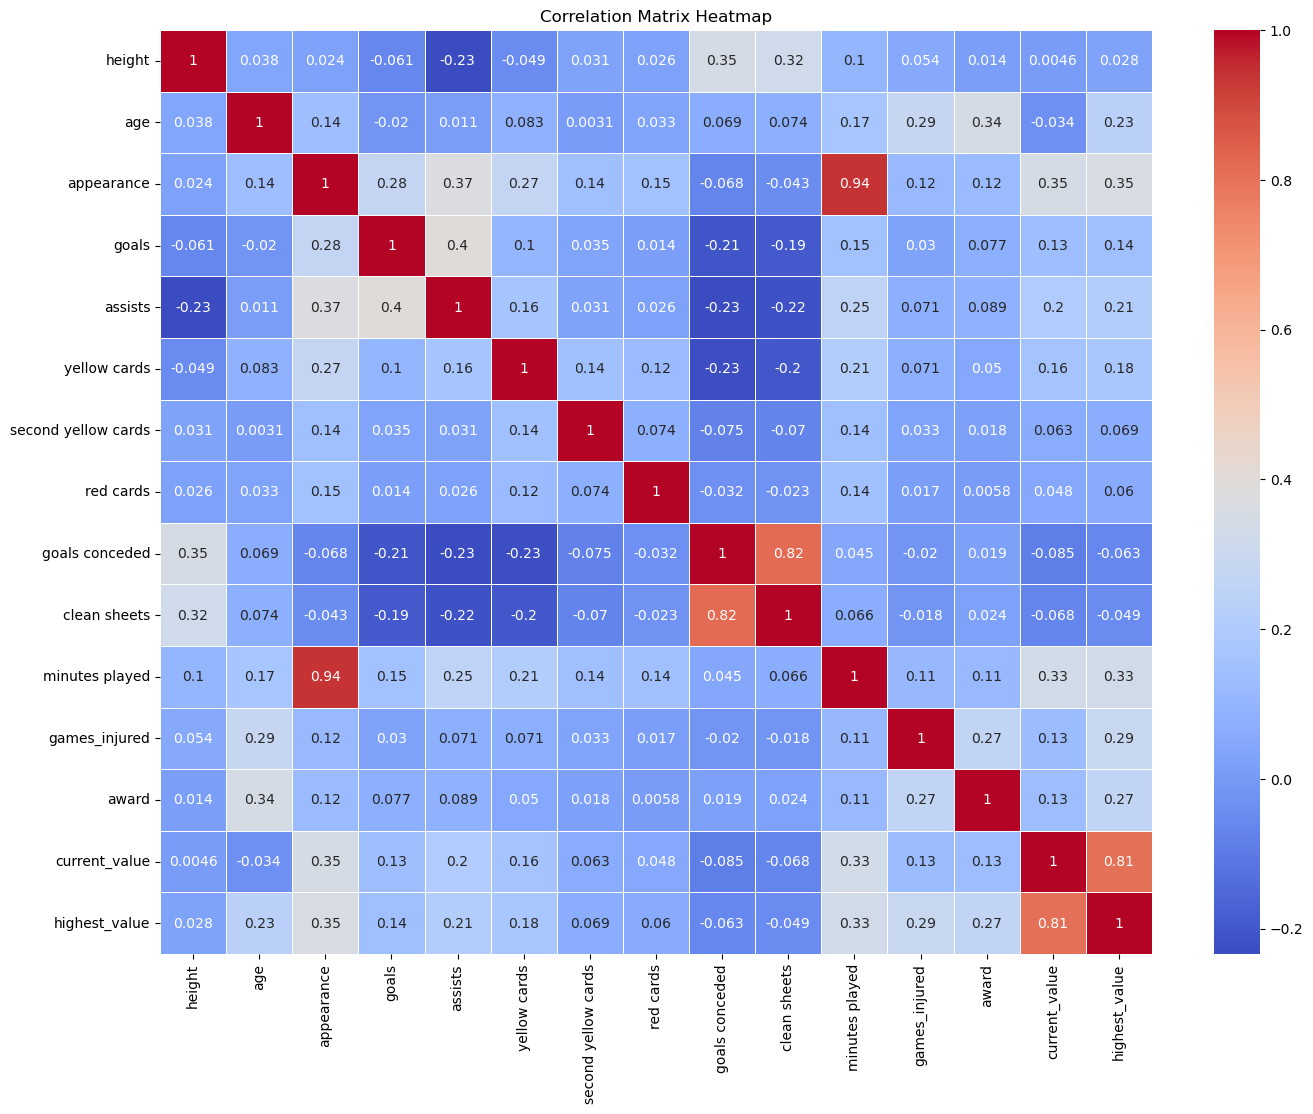

In [297]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# model Training

In [298]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

In [299]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'games_injured', 'award',
       'current_value', 'highest_value'],
      dtype='object')

In [300]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'games_injured', 'award',
       'current_value', 'highest_value'],
      dtype='object')

In [301]:
categorical_features = ["team", "position"]

In [394]:
df_t = pd.get_dummies(df, columns=categorical_features)

In [395]:
correlation = df_t.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.815937
appearance             0.347934
minutes played         0.336958
assists                0.199079
                         ...   
position_Attack       -0.066481
clean sheets          -0.067876
position_midfield     -0.083246
goals conceded        -0.083548
position_Goalkeeper   -0.129556
Name: current_value, Length: 398, dtype: float64


In [396]:
threshold = 0.1
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_Goalkeeper'],
      dtype='object')

In [397]:
df_t = df_t[selected_features]
df_t

,appearance,goals,assists,yellow cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_Goalkeeper
8,34,0.000000,0.000000,0.130529,2758,47,13,0,2000000,2000000,0
20,39,0.129125,0.064562,0.225968,2788,0,0,1,800000,800000,0
21,51,0.153759,0.102506,0.000000,3512,0,0,1,800000,800000,0
55,65,0.000000,0.000000,0.015340,5867,0,0,0,2000000,2000000,1
56,31,0.000000,0.000000,0.064516,2790,89,14,0,600000,3500000,1
...,...,...,...,...,...,...,...,...,...,...,...
10748,32,0.226700,0.000000,0.283375,1588,0,0,0,200000,200000,0
10749,16,0.175953,0.087977,0.263930,1023,0,0,0,75000,75000,0
10750,26,0.372671,0.186335,0.186335,1449,102,18,0,300000,300000,0
10751,20,0.375000,0.000000,0.187500,960,0,0,0,50000,50000,0


#### 4. Prepare train and test data

In [398]:
# Prepare data
X = df_t.drop(['current_value'], axis=1)
y = df_t['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [399]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [400]:
y_pred = model.predict(X_test_scaled)

In [401]:
y_base = [y_train.mean()] * len(y_test)

In [402]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:.2e}')

Mean Squared Error of base model: 1.18e+12


In [403]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:.2e}')
print(f'Mean Squared Error for testing: {mse_test:.2e}')

Mean Squared Error for training: 3.41e+11
Mean Squared Error for testing: 3.76e+11


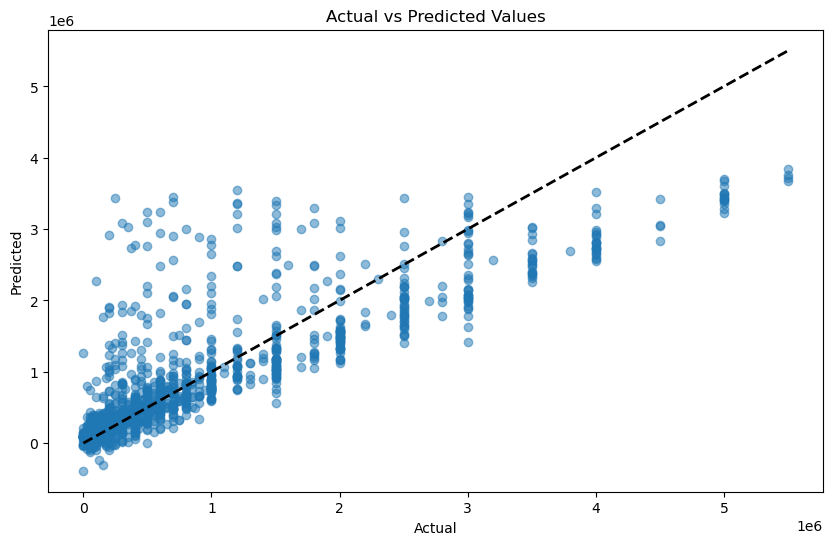

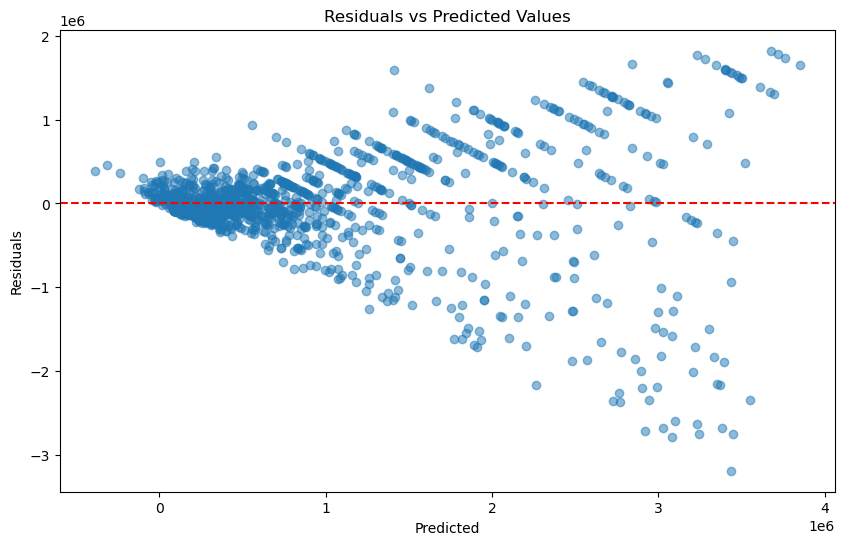

In [404]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()